# OpenCV Morphological Operations

Morphological operations are image processing techniques used to manipulate the shape and structure of objects in an image. OpenCV, a popular computer vision library in Python, provides functions to perform various morphological operations, including erosion, dilation, opening, closing, and more. These operations are often used in tasks such as noise reduction, object segmentation, and feature extraction.

Morphological operations based on OpenCV are as follows:

•	Erosion

•	Dilation

•	Opening

•	Closing

•	Morphological Gradient

•	Top hat

•	Black hat


## Erosion

Erosion primarily involves eroding the outer surface (the foreground) of the image. As binary images only contain two pixels 0 and 255, it primarily involves eroding the foreground of the image and it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel. We can make use of NumPy’s ones() function to define a kernel. 

In [2]:
# Install OpenCV with contrib modules
!pip install opencv-contrib-python


In [3]:
# Importing OpenCV and others Libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from IPython.display import display, Image

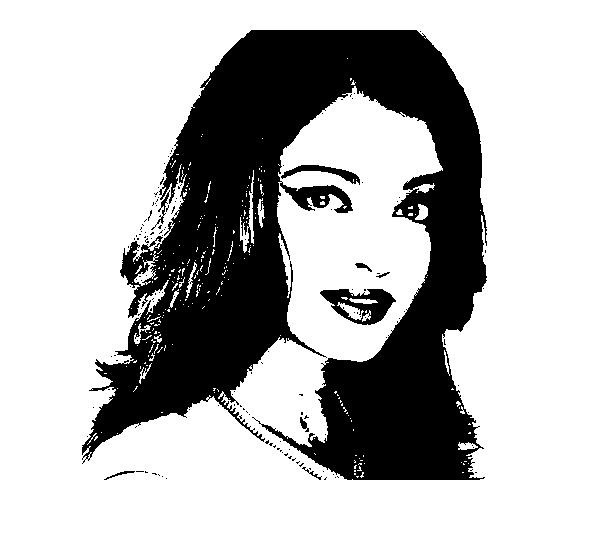

In [4]:
# Reading the image using OpenCV
image = cv2.imread('morph_input.jpg')

# Checking if the image was read successfully
if image is None:
    print("Image not found or invalid format")
else:
    # Display the image using IPython.display
    display(Image(filename='morph_input.jpg'))

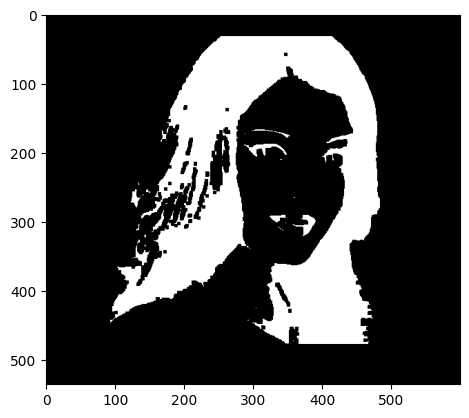

In [5]:
# Read the image in grayscale mode
image_path = 'morph_input.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using OTSU thresholding
_, binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Define the kernel
kernel = np.ones((5, 5), np.uint8)

# Invert the binary image
invert = cv2.bitwise_not(binr)

# Erode the inverted image
erosion = cv2.erode(invert, kernel, iterations=1)

# Display the output
plt.imshow(erosion, cmap='gray')
plt.show()

## Dilation

Dilation involves dilating the outer surface (the foreground) of the image. As binary images only contain two pixels 0 and 255, it primarily involves expanding the foreground of the image and it is suggested to have the foreground as white. The thickness of erosion depends on the size and shape of the defined kernel. We can make use of NumPy’s ones() function to define a kernel.

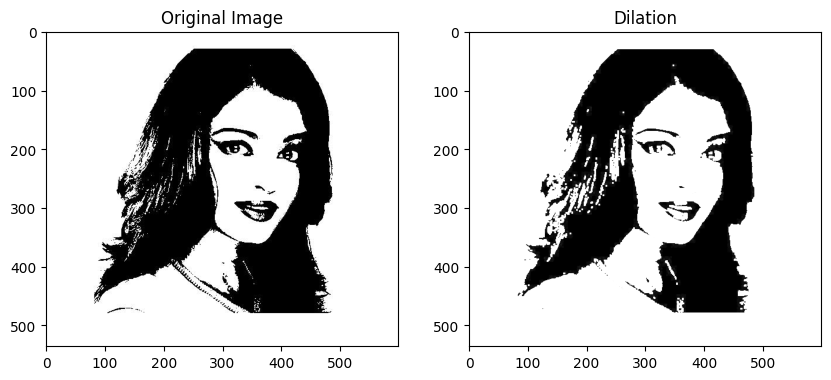

In [6]:
# Reading the image in grayscale mode
image_path = 'morph_input.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a kernel structuring element
kernel = np.ones((3, 3), np.uint8)

# Performing dilation
dilation = cv2.dilate(img, kernel, iterations=1)

# Displaying the original image and the result of dilation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation")

plt.show()


## Opening



Opening involves erosion followed by dilation in the outer surface (the foreground) of the image. All the above-said constraints for erosion and dilation applies here. It is a blend of the two prime methods. It is generally used to remove the noise in the image.

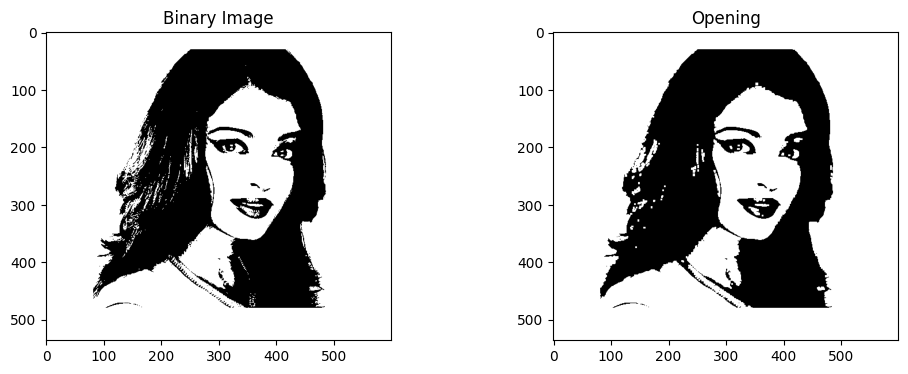

In [7]:
# Reading the image in grayscale mode
image_path = 'morph_input.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using OTSU thresholding
_, binarized_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define a 3x3 kernel filled with ones
kernel = np.ones((3, 3), np.uint8)

# Perform opening using morphologyEx
opening = cv2.morphologyEx(binarized_img, cv2.MORPH_OPEN, kernel)

# Display the original binary image and the result of opening
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(binarized_img, cmap='gray')
plt.title("Binary Image")

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title("Opening")

plt.show()

## Closing


Closing involves dilation followed by erosion in the outer surface (the foreground) of the image. All the above-said constraints for erosion and dilation applies here. It is a blend of the two prime methods. It is generally used to remove the noise in the image.

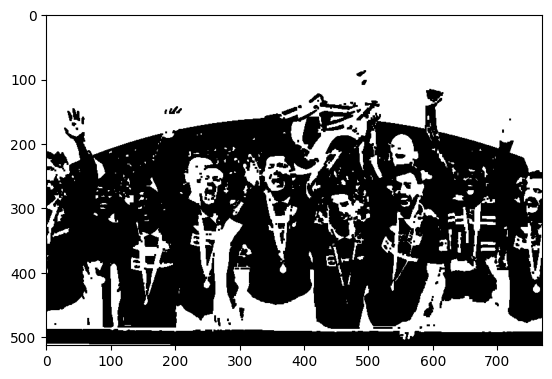

In [8]:
# Read the image in grayscale mode
image_path = 'manchester_united.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
  
# print the output
plt.imshow(closing, cmap='gray')

## Morphological Gradient
Morphological gradient is slightly different than the other operations, because, the morphological gradient first applies erosion and dilation individually on the image and then computes the difference between the eroded and dilated image. The output will be an outline of the given image.

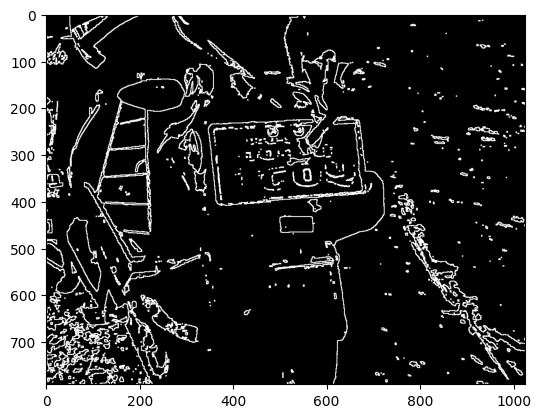

In [9]:
# read the image
img = cv2.imread("number_plate.jpg", 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((3, 3), np.uint8)
  
# invert the image
invert = cv2.bitwise_not(binr)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_GRADIENT, 
                                  kernel)
  
# print the output
plt.imshow(morph_gradient, cmap='gray')

## Top Hat
Top Hat is yet another morphological operation where Opening is performed on the binary image and the output of this operation is a difference between the input image and the opened image. 

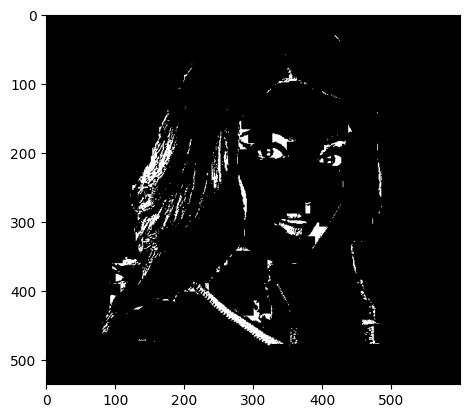

In [10]:
#Reading the image
img = cv2.imread("morph_input.jpg", 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((13, 13), np.uint8)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(binr,
                                  cv2.MORPH_TOPHAT,
                                  kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')

## Black Hat
The black-hat operation is used to do the opposite, enhancing dark objects of interest on a bright background. The output of this operation is the difference between the closing of the input image and the input image.

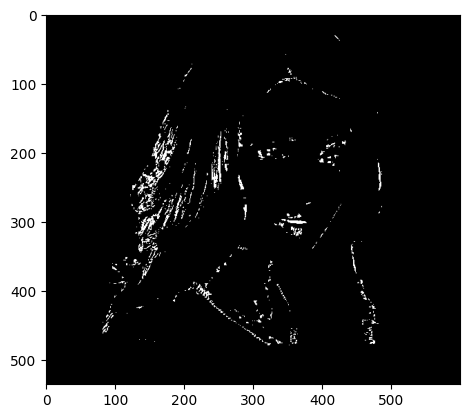

In [11]:
# Reading the image
img = cv2.imread("morph_input.jpg", 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
# define the kernel
kernel = np.ones((5, 5), np.uint8)
  
# invert the image
invert = cv2.bitwise_not(binr)
  
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_BLACKHAT,
                                  kernel)
# print the output
plt.imshow(morph_gradient, cmap='gray')